In [1]:
import pandas as pd
import numpy as np

from googletrans import Translator


import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

C:\Users\krith\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv("14_gen_dataset.csv", encoding='latin1')

In [3]:
df = pd.DataFrame(data = dataset)

In [4]:
df.head()

,Stars,Title,Description,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,3,"Amazon Leistung Top, Intel Leistung ok",Habe CPU bei Amazon gekauft und auch verpackte...,NaN,NaN,NaN
1,3,The heat is hot,Super hot CPU. Investing in this means investi...,NaN,NaN,NaN
2,3,Memory controller isn't that great,It's no secret that the memory controller is a...,NaN,NaN,NaN
3,4,A Monster CPU with One Major Caveat,"I built PC with the new Intel i9-14900k, and I...",NaN,NaN,NaN
4,4,This is thing is super hot.,"May be a little excessive and unnecessary, but...",NaN,NaN,NaN


In [5]:
df.shape

(372, 6)

In [6]:
df = df.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'])

In [7]:
#REMOVING DUPLICATE ELEMENTS

duplicate_rows = df[df.duplicated()]
df = df.drop_duplicates()

In [8]:
df['Description'].fillna('', inplace=True)


df['review_length'] = df['Description'].apply(len)

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
df.head()

,Stars,Title,Description,review_length
0,3,"Amazon Leistung Top, Intel Leistung ok",Habe CPU bei Amazon gekauft und auch verpackte...,751
1,3,The heat is hot,Super hot CPU. Investing in this means investi...,75
2,3,Memory controller isn't that great,It's no secret that the memory controller is a...,253
3,4,A Monster CPU with One Major Caveat,"I built PC with the new Intel i9-14900k, and I...",1108
4,4,This is thing is super hot.,"May be a little excessive and unnecessary, but...",326


In [11]:
translator = Translator()

In [12]:
def translate_text(Description):
    try:
        
        translated = translator.translate(Description, dest='en')
        return translated.review
    except Exception as e:
        print(f"Error translating text: {Description}. Error: {e}")
        return Description

In [13]:
df['Description'] = df['Description'].apply(translate_text)

Error translating text: Habe CPU bei Amazon gekauft und auch verpackte Neuware erhalten.Seitens Amazon 5 SterneZur Intel CPU. Die CPU Generation ist gelungen. ABER die Amd Konkurrenz hat auch Ihre Vorteile.Wegen nicht genutzter Optimierungsm?lichkeiten muss ich Intel Punkte abziehen und 3 Sterne verleihen.Contra:Thread Application Optimizer nicht verf?barCPU's allgemein sehr teuer. Ca 300 Euro- 340 Euro ohne K?ler.Grauzone:Gamingleistung eigentlich sehr gut,  aber im Vergleich zum AMD Gaming CPU wiederum befriedigend.Energieverbrauch. F? meine Anwendungsf?le ist es ok bis gut.Pro:Hohe TaktratenCPU ist das rundeste GesamtpaketIntel hat Optimierungsm?lichkeiten ?er Software ( Thread Application Optimizer, OC RAM, Microsoft Direct Storage, Moderne Schnittstellen)WLAN7. Error: 'Translated' object has no attribute 'review'
Error translating text: Super hot CPU. Investing in this means investing in serious cooling for it.. Error: 'Translated' object has no attribute 'review'
Error translatin

In [14]:
df.tail()

,Stars,Title,Description,review_length
366,3,"How about sending a CPU in a box, and not a bag?","Its a great CPU.The packaging by Amazon, in sh...",100
367,3,Heavy workload doesn't come out well,"I never got to try it, but I suppose it's not ...",117
368,3,"Linux, your Mileage may vary..",This CPU is obviously used seeing as there's t...,100
369,3,Damaged box,It doesn't run without a graphics card.,39
371,3,I should have gone with AMD,Because of the crash problem and we are told t...,100


In [15]:
#REMOVING DUPLICATE ELEMENTS

duplicate_rows = df[df.duplicated()]
df = df.drop_duplicates()

In [16]:
df.shape

(263, 4)

In [17]:
print(df.isnull().sum())

Stars            0
Title            0
Description      0
review_length    0
dtype: int64


In [18]:
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\krith\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
#TEST PREPROCESSING

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Convert text to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatization
    return text

In [20]:
df.head()

,Stars,Title,Description,review_length
0,3,"Amazon Leistung Top, Intel Leistung ok",Habe CPU bei Amazon gekauft und auch verpackte...,751
1,3,The heat is hot,Super hot CPU. Investing in this means investi...,75
2,3,Memory controller isn't that great,It's no secret that the memory controller is a...,253
3,4,A Monster CPU with One Major Caveat,"I built PC with the new Intel i9-14900k, and I...",1108
4,4,This is thing is super hot.,"May be a little excessive and unnecessary, but...",326


In [21]:
preprocessed_text = df['Description'].apply(preprocess_text)

In [22]:
df['Description'] = preprocessed_text

In [23]:
df.head()

,Stars,Title,Description,review_length
0,3,"Amazon Leistung Top, Intel Leistung ok",habe cpu bei amazon gekauft und auch verpackte...,751
1,3,The heat is hot,super hot cpu investing mean investing serious...,75
2,3,Memory controller isn't that great,secret memory controller lottery th gen cpu fl...,253
3,4,A Monster CPU with One Major Caveat,built pc new intel ik must say beast processor...,1108
4,4,This is thing is super hot.,may little excessive unnecessary glad got one ...,326


In [24]:
#VECTORIZATION

from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()


tfidf_matrix = tfidf_vectorizer.fit_transform(df['Description'])


df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_matrix)
print(df_tfidf)

  (0, 2416)	0.10176147399520295
  (0, 1762)	0.10176147399520295
  (0, 2642)	0.10176147399520295
  (0, 736)	0.0964167320656386
  (0, 1726)	0.0964167320656386
  (0, 2234)	0.06746852267106729
  (0, 1902)	0.08135075074944607
  (0, 2780)	0.07600600881988175
  (0, 2548)	0.08135075074944607
  (0, 883)	0.09227102814722414
  (0, 1132)	0.10176147399520295
  (0, 2387)	0.10176147399520295
  (0, 613)	0.08601983127604922
  (0, 2709)	0.10176147399520295
  (0, 1195)	0.10176147399520295
  (0, 267)	0.0964167320656386
  (0, 1921)	0.08601983127604922
  (0, 118)	0.1092944646532992
  (0, 1699)	0.09227102814722414
  (0, 234)	0.10176147399520295
  (0, 3043)	0.10176147399520295
  (0, 1094)	0.04840956934370358
  (0, 3120)	0.10176147399520295
  (0, 2964)	0.10176147399520295
  (0, 1344)	0.05721183870509395
  :	:
  (259, 2099)	0.21722285002246863
  (259, 2719)	0.256085451649267
  (259, 2152)	0.18227114116660895
  (260, 2439)	0.3271251615689029
  (260, 1901)	0.34182277675060785
  (260, 1999)	0.2814701988144174
  (2

In [25]:
print(df_tfidf.isnull().sum())

aber           0
abierto        0
abit           0
able           0
ableton        0
              ..
ça             0
êtes           0
über           0
überhitzung    0
übertaktung    0
Length: 3131, dtype: int64


In [26]:
#CALCULATING SENTIMENT SCORE USING VADER
def calculate_sentiment_scores(text):
    
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']

In [27]:
df['sentiment_scores'] = df['Description'].apply(calculate_sentiment_scores)

In [28]:
def map_rating_to_sentiment(sentiment_scores):
    if sentiment_scores > 0.5:
        return 1
    elif sentiment_scores < 0:
        return -1
    else:
        return 0


df_tfidf['sentiment'] = df['sentiment_scores'].apply(map_rating_to_sentiment)
df['sentiment'] = df['sentiment_scores'].apply(map_rating_to_sentiment)

In [29]:
print("Number of positive sentiments:", df[df['sentiment'] == 1].shape[0])
print("Number of negative sentiments:", df[df['sentiment'] == -1].shape[0])
print("Number of neutral sentiments:", df[df['sentiment'] == 0].shape[0])

Number of positive sentiments: 115
Number of negative sentiments: 54
Number of neutral sentiments: 94


In [30]:
#UPSAMPLING

from sklearn.utils import resample

df_majority = df[df['sentiment'] == 0]  
df_minority1 = df[df['sentiment'] == 1]
df_minority2 = df[df['sentiment'] == -1]


df_minority1_upsampled = resample(df_minority1, 
                                  replace=True,    
                                  n_samples=len(df_majority),    
                                  random_state=42)  

df_minority2_upsampled = resample(df_minority2, 
                                  replace=True,     
                                  n_samples=len(df_majority),    
                                  random_state=42)


df = pd.concat([df_majority, df_minority1_upsampled, df_minority2_upsampled])


df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [31]:
print("Number of positive sentiments:", df[df['sentiment'] == 1].shape[0])
print("Number of negative sentiments:", df[df['sentiment'] == -1].shape[0])
print("Number of neutral sentiments:", df[df['sentiment'] == 0].shape[0])

Number of positive sentiments: 94
Number of negative sentiments: 94
Number of neutral sentiments: 94


In [32]:
df_tfidf.isnull().sum().sum()

48

In [33]:
df_tfidf.dropna(inplace=True)

In [34]:
df_tfidf.isnull().sum().sum()

0

In [35]:
df_tfidf['sentiment'] = df_tfidf['sentiment'].astype(int)



print(df_tfidf['sentiment'])

0     -1
1      1
2     -1
3      1
4      1
      ..
258    1
259   -1
260    1
261    1
262   -1
Name: sentiment, Length: 215, dtype: int32


In [36]:
df_tfidf.head()

,aber,abierto,abit,able,ableton,abnormally,aboutif,absolut,absolute,absolutely,...,zusätzlichen,zwar,zwei,ã¼ber,ça,êtes,über,überhitzung,übertaktung,sentiment
0,0.177767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


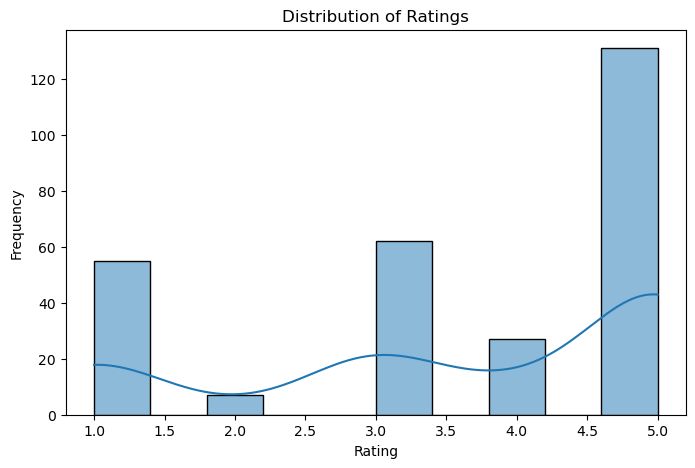

In [37]:
#BAR GRAPH

import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8,5))
sns.histplot(df['Stars'], bins=10, kde=True,edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

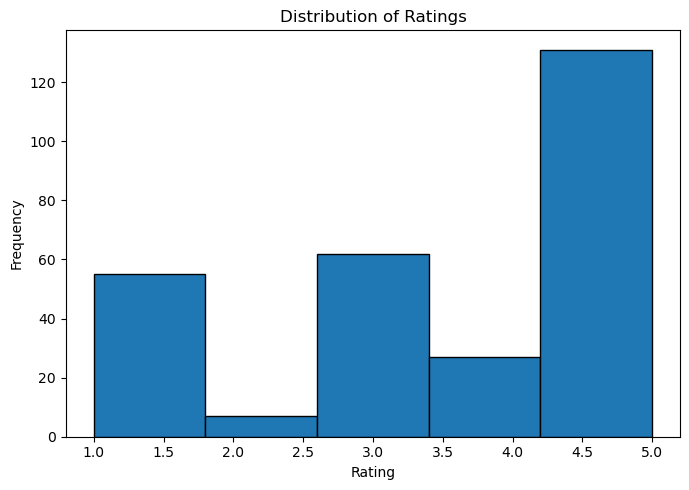

In [38]:
#HISTOGRAM

plt.figure(figsize=(7,5))
plt.hist(df['Stars'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.tight_layout()
plt.show()

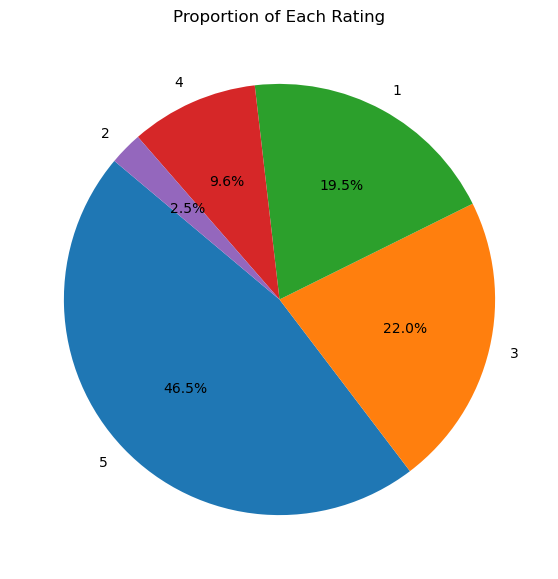

In [39]:
#PIE CHART

rating_counts = df['Stars'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Rating')
plt.show()

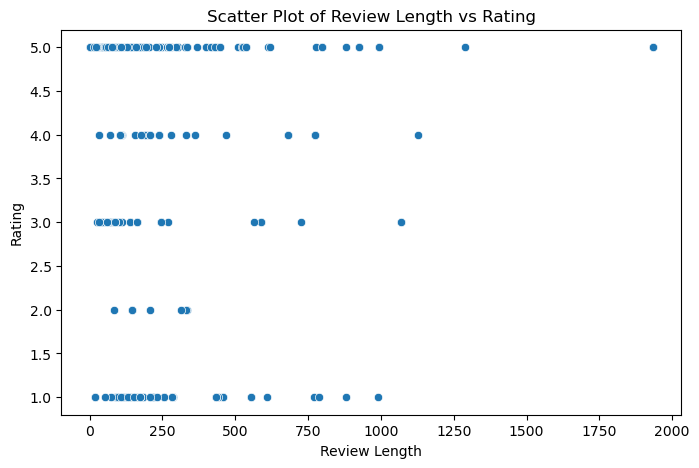

In [40]:
#SCATTER PLOT

df['review_length'] = df['Description'].apply(len)

plt.figure(figsize=(8,5))
sns.scatterplot(x='review_length', y='Stars', data=df)
plt.title('Scatter Plot of Review Length vs Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

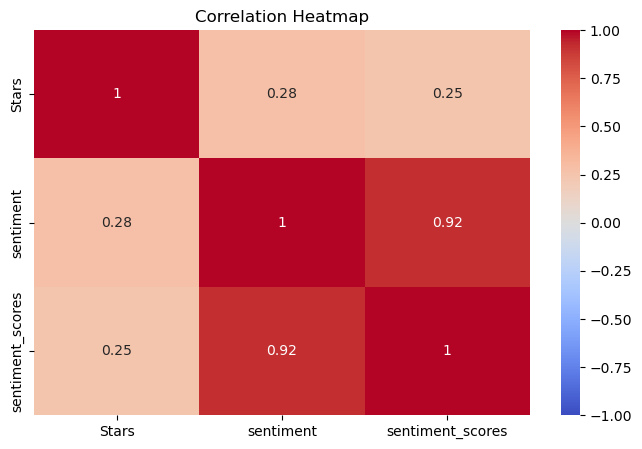

In [41]:
#HEATMAP

import seaborn as sns
import matplotlib.pyplot as plt

subset_df = df[['Stars', 'sentiment', 'sentiment_scores']]

plt.figure(figsize=(8,5))
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

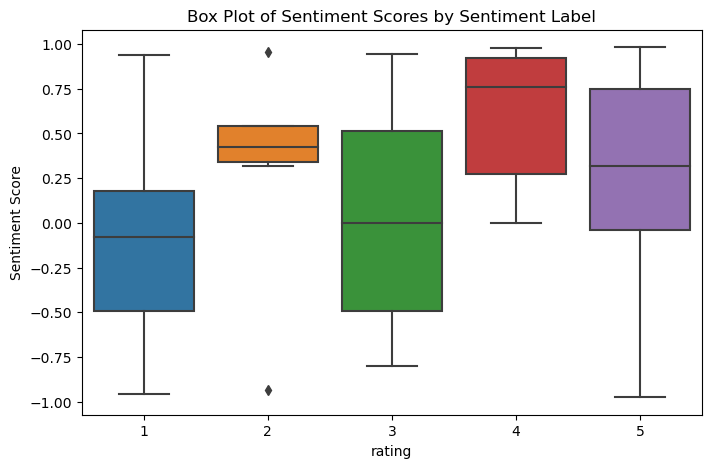

In [42]:
#BOX PLOT

plt.figure(figsize=(8,5))
sns.boxplot(x='Stars', y='sentiment_scores', data=df)
plt.title('Box Plot of Sentiment Scores by Sentiment Label')
plt.xlabel('rating')
plt.ylabel('Sentiment Score')
plt.show()

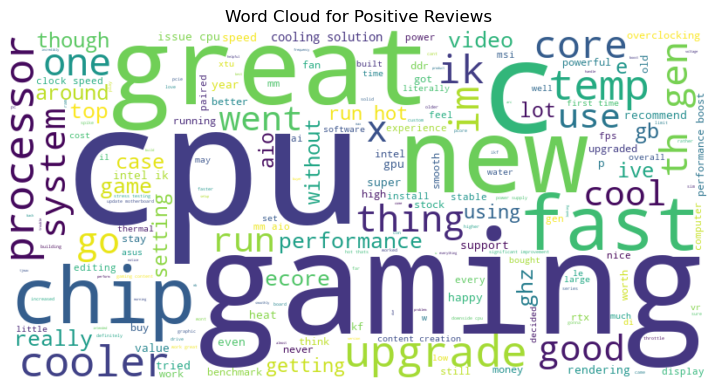

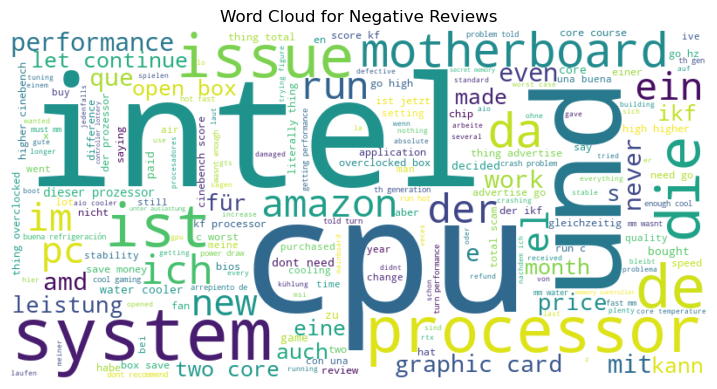

In [43]:
#WORDCLOUD

from wordcloud import WordCloud

positive_text = ' '.join(df[df['sentiment_scores'] > 0.6]['Description'])
negative_text = ' '.join(df[df['sentiment_scores'] < 0]['Description'])


plt.figure(figsize=(9, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()


plt.figure(figsize=(9, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

In [44]:
#SPLITTING DATASET INTO TESTING AND TRAINING SETS

from sklearn.model_selection import train_test_split

In [45]:
print(df_tfidf.isnull().sum())

aber           0
abierto        0
abit           0
able           0
ableton        0
              ..
êtes           0
über           0
überhitzung    0
übertaktung    0
sentiment      0
Length: 3132, dtype: int64


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stars             282 non-null    int64  
 1   Title             282 non-null    object 
 2   Description       282 non-null    object 
 3   review_length     282 non-null    int64  
 4   sentiment_scores  282 non-null    float64
 5   sentiment         282 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 13.3+ KB


In [47]:
X = df_tfidf.drop(columns='sentiment')
y = df_tfidf['sentiment']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [49]:
print(X_train.shape)
print(y_train.shape)

(161, 3131)
(161,)


In [50]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (161, 3131)
Shape of X_test: (54, 3131)
Shape of y_train: (161,)
Shape of y_test: (54,)


In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


param_distributions = {
    'C': expon(scale=1.0),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(expon(scale=0.1).rvs(10)),
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 0.1, 0.5, 1.0]
}


svm = SVC()


random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_distributions, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)


random_search.fit(X_train, y_train)


print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")


best_svm = random_search.best_estimator_


y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'C': 0.059838768608680676, 'coef0': 1.0, 'degree': 2, 'gamma': 0.057612807215298115, 'kernel': 'sigmoid'}
Best cross-validation score: 0.490719696969697
Test set accuracy: 0.4074074074074074


In [53]:
import tensorflow as tf

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout


model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=1104))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


history = model.fit(X_train, y_train, epochs=30, batch_size=100, validation_data=(X_test, y_test))

y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

C:\Users\krith\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4723 - loss: 0.6930 - val_accuracy: 0.3704 - val_loss: 0.6402
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3087 - loss: 0.6612 - val_accuracy: 0.3704 - val_loss: 0.5847
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3220 - loss: 0.6304 - val_accuracy: 0.3704 - val_loss: 0.5447
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3187 - loss: 0.6076 - val_accuracy: 0.3704 - val_loss: 0.5169
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3220 - loss: 0.6131 - val_accuracy: 0.3704 - val_loss: 0.4996
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3287 - loss: 0.5762 - val_accuracy: 0.3704 - val_loss: 0.4904
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3187 - loss: 0.6335 - val_accuracy: 0.3704 - val_loss: 0.4927
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3287 - loss: 0.6093 - val_accuracy: 0.3704 - val_loss: 0.4946
Epoch 9/30
2/2 ━

In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


max_words = 1000
max_len = 20
tokenizer = Tokenizer(num_words=max_words)


model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/10


C:\Users\krith\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3483 - loss: 0.6872 - val_accuracy: 0.3704 - val_loss: 0.6463
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.2993 - loss: 0.6725 - val_accuracy: 0.3704 - val_loss: 0.6293
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.3392 - loss: 0.6549 - val_accuracy: 0.3704 - val_loss: 0.5762
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.3142 - loss: 0.6359 - val_accuracy: 0.3704 - val_loss: 0.5053
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.3102 - loss: 0.6431 - val_accuracy: 0.3704 - val_loss: 0.4798
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.3303 - loss: 0.6555 - val_accuracy: 0.3704 - val_loss: 0.4856
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.3430 - loss: 0.7848 - val_accuracy: 0.3704 - val_loss: 0.4813
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.3547 - loss: 0.6658 - val_accuracy: 0.3704 - val_loss: 0.4857
Epoch 9/10
6/6 ━━━━

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


param_distributions = {
    'penalty': ['l1', 'l2'],  
    'C': uniform(0.001, 100)  
}


logistic_regression = LogisticRegression(solver='liblinear')  


random_search = RandomizedSearchCV(logistic_regression, param_distributions, n_iter=100, cv=10, scoring='accuracy', random_state=42)


random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


best_model = random_search.best_estimator_


test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

KeyboardInterrupt: 

In [56]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform, randint
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


param_distributions = {
    'n_estimators': randint(50, 300),  
    'learning_rate': uniform(0.01, 0.6),  
    'max_depth': randint(3, 10),  
    'subsample': uniform(0.5, 0.5),  
    'colsample_bytree': uniform(0.5, 0.5),  
    'gamma': uniform(0, 5)  
}


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=100,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train, y_train_encoded)


best_xgb_model = random_search.best_estimator_


y_pred = best_xgb_model.predict(X_test)


print("Best Parameters:", random_search.best_params_)
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))

C:\Users\krith\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [21:14:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.6872700594236812, 'gamma': 4.75357153204958, 'learning_rate': 0.4491963650868431, 'max_depth': 7, 'n_estimators': 70, 'subsample': 0.5780093202212182}
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        20
           2       0.41      1.00      0.58        22

    accuracy                           0.41        54
   macro avg       0.14      0.33      0.19        54
weighted avg       0.17      0.41      0.24        54

Accuracy: 0.4074074074074074


C:\Users\krith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


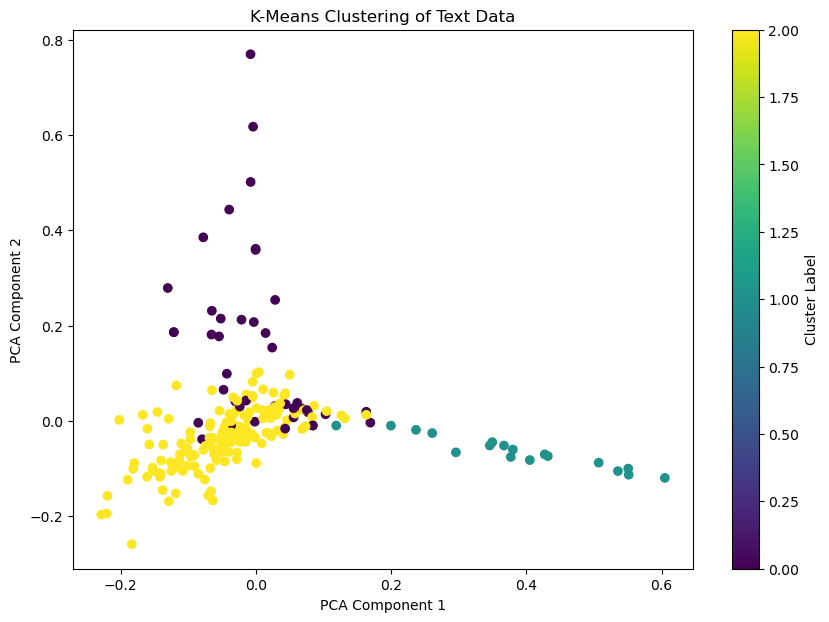

In [57]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)


clusters = kmeans.labels_


pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X)


plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title("K-Means Clustering of Text Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

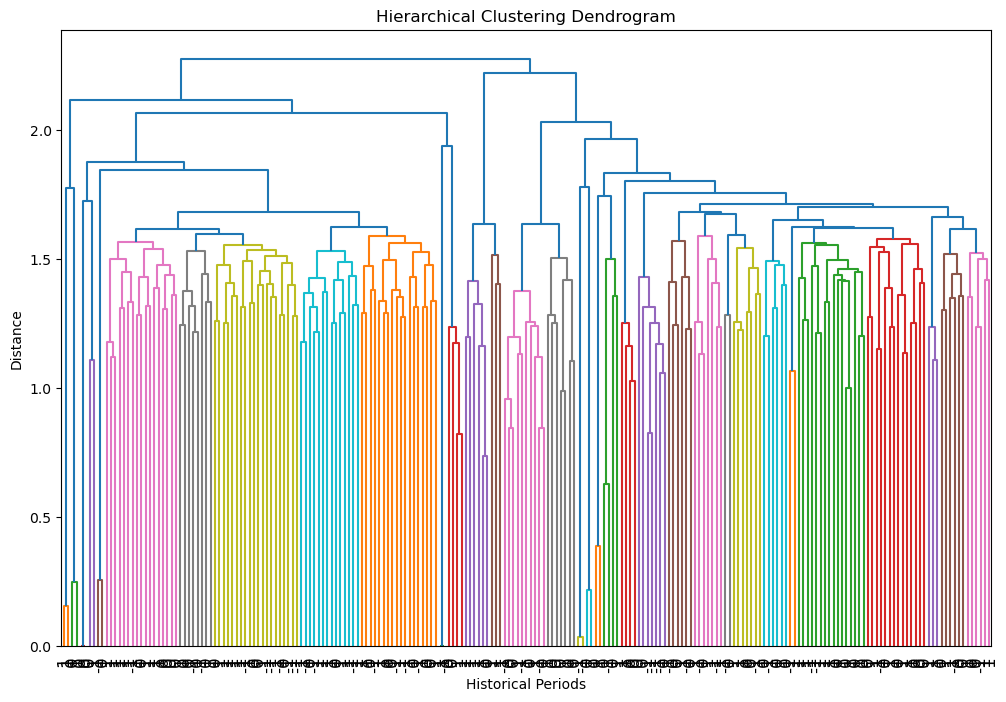

In [58]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


cosine_similarities = cosine_similarity(X)


Z = linkage(cosine_similarities, method='complete')


plt.figure(figsize=(12, 8))
dendrogram(Z, labels=df_tfidf['sentiment'].tolist(), orientation='top', leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Historical Periods')
plt.ylabel('Distance')
plt.show()